In [1]:
import math
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import re
import seaborn as sns
import pandas as pd
import random
from scipy import stats  #t-test
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from scipy.interpolate import interp1d
from itertools import groupby

C:\Users\ljr\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
pathturn11 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn1"
filesturn11= os.listdir(pathturn11)
pathturn12 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn2"
filesturn12= os.listdir(pathturn12)
pathturn13 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn3"
filesturn13= os.listdir(pathturn13)
pathturn14 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn4"
filesturn14= os.listdir(pathturn14)
pathturn15 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn5"
filesturn15= os.listdir(pathturn15)
pathturn16 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn6"
filesturn16= os.listdir(pathturn16)
pathturn17 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn7"
filesturn17= os.listdir(pathturn17)
pathturn18 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn8"
filesturn18= os.listdir(pathturn18)
pathturn19 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn9"
filesturn19= os.listdir(pathturn19)
pathturn110 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn10"
filesturn110= os.listdir(pathturn110)

pathturn11c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn1"
filesturn11c= os.listdir(pathturn11c)
pathturn12c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn2"
filesturn12c= os.listdir(pathturn12c)
pathturn13c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn3"
filesturn13c= os.listdir(pathturn13c)
pathturn14c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn4"
filesturn14c= os.listdir(pathturn14c)
pathturn15c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn5"
filesturn15c= os.listdir(pathturn15c)
pathturn16c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn6"
filesturn16c= os.listdir(pathturn16c)
pathturn17c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn7"
filesturn17c= os.listdir(pathturn17c)
pathturn18c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn8"
filesturn18c= os.listdir(pathturn18c)
pathturn19c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn9"
filesturn19c= os.listdir(pathturn19c)
pathturn110c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn10"
filesturn110c= os.listdir(pathturn110c)

In [3]:
pathturn111 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn11"
filesturn111= os.listdir(pathturn111)
pathturn112 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn12"
filesturn112= os.listdir(pathturn112)
pathturn113 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn13"
filesturn113= os.listdir(pathturn113)
pathturn114 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn14"
filesturn114= os.listdir(pathturn114)
pathturn115 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn15"
filesturn115= os.listdir(pathturn115)
pathturn116 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn16"
filesturn116= os.listdir(pathturn116)
pathturn117 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn17"
filesturn117= os.listdir(pathturn117)
pathturn118 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn18"
filesturn118= os.listdir(pathturn118)
pathturn119 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn19"
filesturn119= os.listdir(pathturn119)
pathturn120 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn20"
filesturn120= os.listdir(pathturn120)
pathturn121 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn21"
filesturn121= os.listdir(pathturn121)
pathturn122 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn22"
filesturn122= os.listdir(pathturn122)
pathturn123 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn23"
filesturn123= os.listdir(pathturn123)
pathturn124 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn24"
filesturn124= os.listdir(pathturn124)


pathturn111c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn11"
filesturn111c= os.listdir(pathturn111c)
pathturn112c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn12"
filesturn112c= os.listdir(pathturn112c)
pathturn113c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn13"
filesturn113c= os.listdir(pathturn113c)
pathturn114c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn14"
filesturn114c= os.listdir(pathturn114c)
pathturn115c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn15"
filesturn115c= os.listdir(pathturn115c)
pathturn116c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn16"
filesturn116c= os.listdir(pathturn116c)
pathturn117c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn17"
filesturn117c= os.listdir(pathturn117c)
pathturn118c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn18"
filesturn118c= os.listdir(pathturn118c)
pathturn119c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn19"
filesturn119c= os.listdir(pathturn119c)
pathturn120c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn20"
filesturn120c= os.listdir(pathturn120c)
pathturn121c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn21"
filesturn121c= os.listdir(pathturn121c)
pathturn122c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn22"
filesturn122c= os.listdir(pathturn122c)
pathturn123c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn23"
filesturn123c= os.listdir(pathturn123c)
pathturn124c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn24"
filesturn124c= os.listdir(pathturn124c)

In [4]:
pathturn21 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\fa\turn1"
filesturn21= os.listdir(pathturn21)
pathturn22 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\fa\turn2"
filesturn22= os.listdir(pathturn22)
pathturn23 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\fa\turn3"
filesturn23= os.listdir(pathturn23)
pathturn24 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\fa\turn4"
filesturn24= os.listdir(pathturn24)
pathturn25 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\fa\turn5"
filesturn25= os.listdir(pathturn25)

pathturn21c = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\chi\turn1"
filesturn21c= os.listdir(pathturn21c)
pathturn22c = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\chi\turn2"
filesturn22c= os.listdir(pathturn22c)
pathturn23c = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\chi\turn3"
filesturn23c= os.listdir(pathturn23c)
pathturn24c = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\chi\turn4"
filesturn24c= os.listdir(pathturn24c)
pathturn25c = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\chi\turn5"
filesturn25c= os.listdir(pathturn25c)

In [5]:
pathturn31 = r"C:\LJR\babylab\English\cut\high\8496\turntaking\block\fa\turn1"
filesturn31= os.listdir(pathturn31)
pathturn32 = r"C:\LJR\babylab\English\cut\high\8496\turntaking\block\fa\turn2"
filesturn32= os.listdir(pathturn32)

pathturn31c = r"C:\LJR\babylab\English\cut\high\8496\turntaking\block\chi\turn1"
filesturn31c= os.listdir(pathturn31c)
pathturn32c = r"C:\LJR\babylab\English\cut\high\8496\turntaking\block\chi\turn2"
filesturn32c= os.listdir(pathturn32c)

In [6]:
pathturn41 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn1"
filesturn41= os.listdir(pathturn41)
pathturn42 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn2"
filesturn42= os.listdir(pathturn42)
pathturn43 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn3"
filesturn43= os.listdir(pathturn43)
pathturn44 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn4"
filesturn44= os.listdir(pathturn44)
pathturn45 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn5"
filesturn45= os.listdir(pathturn45)
pathturn46 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn6"
filesturn46= os.listdir(pathturn46)
pathturn47 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn7"
filesturn47= os.listdir(pathturn47)
pathturn48 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn8"
filesturn48= os.listdir(pathturn48)

pathturn41c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn1"
filesturn41c= os.listdir(pathturn41c)
pathturn42c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn2"
filesturn42c= os.listdir(pathturn42c)
pathturn43c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn3"
filesturn43c= os.listdir(pathturn43c)
pathturn44c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn4"
filesturn44c= os.listdir(pathturn44c)
pathturn45c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn5"
filesturn45c= os.listdir(pathturn45c)
pathturn46c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn6"
filesturn46c= os.listdir(pathturn46c)
pathturn47c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn7"
filesturn47c= os.listdir(pathturn47c)
pathturn48c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn8"
filesturn48c= os.listdir(pathturn48c)

In [7]:
pathturn51 = r"C:\LJR\babylab\English\cut\high\9106\turntaking\block\fa\turn1"
filesturn51= os.listdir(pathturn51)
pathturn52 = r"C:\LJR\babylab\English\cut\high\9106\turntaking\block\fa\turn2"
filesturn52= os.listdir(pathturn52)
pathturn53 = r"C:\LJR\babylab\English\cut\high\9106\turntaking\block\fa\turn3"
filesturn53= os.listdir(pathturn53)

pathturn51c = r"C:\LJR\babylab\English\cut\high\9106\turntaking\block\chi\turn1"
filesturn51c= os.listdir(pathturn51c)
pathturn52c = r"C:\LJR\babylab\English\cut\high\9106\turntaking\block\chi\turn2"
filesturn52c= os.listdir(pathturn52c)
pathturn53c = r"C:\LJR\babylab\English\cut\high\9106\turntaking\block\chi\turn3"
filesturn53c= os.listdir(pathturn53c)

In [8]:
pathturn61 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\fa\turn1"
filesturn61= os.listdir(pathturn61)
pathturn62 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\fa\turn2"
filesturn62= os.listdir(pathturn62)
pathturn63 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\fa\turn3"
filesturn63= os.listdir(pathturn63)
pathturn64 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\fa\turn4"
filesturn64= os.listdir(pathturn64)
pathturn65 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\fa\turn5"
filesturn65= os.listdir(pathturn65)

pathturn61c = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\chi\turn1"
filesturn61c= os.listdir(pathturn61c)
pathturn62c = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\chi\turn2"
filesturn62c= os.listdir(pathturn62c)
pathturn63c = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\chi\turn3"
filesturn63c= os.listdir(pathturn63c)
pathturn64c = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\chi\turn4"
filesturn64c= os.listdir(pathturn64c)
pathturn65c = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\chi\turn5"
filesturn65c= os.listdir(pathturn65c)

In [9]:
import sklearn
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [10]:
def featurec(path,files):
    t=np.zeros((len(files),10))
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        duration=librosa.get_duration(y=x, sr=sr1)
        emphasized_signal = np.append(x[0], x[1:] -0.97 * x[:-1])
        mfccss = librosa.feature.mfcc(y=emphasized_signal, sr=sr1)
        mfccs = normalize(mfccss , axis=1)
        mfccs=mfccs.T
        mfccsm=np.mean(mfccs)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=600)
        rf0= np.nanmax(f0)-np.nanmin(f0)
        if np.isnan(rf0):
            print(path+"\\"+files[i])
        maxf0 = np.nanmax(f0)
        minf0 = np.nanmin(f0)
        mmf0=np.nanmean(f0)
        rms = librosa.feature.rms(y=x,frame_length=512, hop_length=128)
        mrms=np.nanmean(rms)
        zerocrossr = librosa.feature.zero_crossing_rate(y=x,frame_length=512, hop_length=128)
        mzerocrossr=np.nanmean(zerocrossr)
        starttime=re.search("(\d+\.\d+)",files[i]).group(0)
        label=0
        feature=np.c_[float(starttime),duration,mfccsm,rf0,maxf0,minf0,mmf0,mrms,mzerocrossr,label]
        t[i,:]=feature
    return t

In [11]:
def featureci(path,files):
    t=np.zeros((len(files),10))
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        duration=librosa.get_duration(y=x, sr=sr1)
        emphasized_signal = np.append(x[0], x[1:] -0.97 * x[:-1])
        mfccss = librosa.feature.mfcc(y=emphasized_signal, sr=sr1)
        mfccs = normalize(mfccss , axis=1)
        mfccs=mfccs.T
        mfccsm=np.mean(mfccs)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=1000)
        rf0= np.nanmax(f0)-np.nanmin(f0)
        if np.isnan(rf0):
            print(path+"\\"+files[i])
        maxf0 = np.nanmax(f0)
        minf0 = np.nanmin(f0)
        mmf0=np.nanmean(f0)
        rms = librosa.feature.rms(y=x,frame_length=512, hop_length=128)
        mrms=np.nanmean(rms)
        zerocrossr = librosa.feature.zero_crossing_rate(y=x,frame_length=512, hop_length=128)
        mzerocrossr=np.nanmean(zerocrossr)
        starttime=re.search("(\d+\.\d+)",files[i]).group(0)
        label=1
        feature=np.c_[float(starttime),duration,mfccsm,rf0,maxf0,minf0,mmf0,mrms,mzerocrossr,label]
        t[i,:]=feature
    return t

In [12]:
def diffc(pathturn,filesturn,pathturnc,filesturnc,conin,idin):
    data=featurec(pathturn,filesturn)
    datai=featureci(pathturnc,filesturnc)
    datamean=np.zeros((len(data[:,6]),len(datai[:,6])))
    datamax=np.zeros((len(data[:,4]),len(datai[:,4])))
    datamin=np.zeros((len(data[:,5]),len(datai[:,5])))
    datarange=np.zeros((len(data[:,3]),len(datai[:,3])))
    for i in range(len(data[:,6])):
        datamean[i,:]=np.abs(datai[:,6]-data[i,6])
        datamax[i,:]=np.abs(datai[:,4]-data[i,4])
        datamin[i,:]=np.abs(datai[:,5]-data[i,5])
        datarange[i,:]=np.abs(datai[:,3]-data[i,3])
    datameano=datamean.reshape(len(data[:,6])*len(datai[:,6]),1)
    datamaxo=datamax.reshape(len(data[:,4])*len(datai[:,4]),1)
    datamino=datamin.reshape(len(data[:,5])*len(datai[:,5]),1)
    datarangeo=datarange.reshape(len(data[:,3])*len(datai[:,3]),1)
    ind=np.zeros(len(data[:,6])*len(datai[:,6]))+idin
    con=np.zeros(len(data[:,6])*len(datai[:,6]))+conin
    dataoutme=np.c_[datameano,con,ind]
    dataoutma=np.c_[datamaxo,con,ind]
    dataoutmi=np.c_[datamino,con,ind]
    dataoutr=np.c_[datarangeo,con,ind]
    return dataoutme, dataoutma, dataoutmi,dataoutr

In [13]:
diffc11,xlabel11,t11,tc11=diffc(pathturn11,filesturn11,pathturn11c,filesturn11c,0,1)
diffc12,xlabel12,t12,tc12=diffc(pathturn12,filesturn12,pathturn12c,filesturn12c,0,1)
diffc13,xlabel13,t13,tc13=diffc(pathturn13,filesturn13,pathturn13c,filesturn13c,0,1)
diffc14,xlabel14,t14,tc14=diffc(pathturn14,filesturn14,pathturn14c,filesturn14c,0,1)
diffc15,xlabel15,t15,tc15=diffc(pathturn15,filesturn15,pathturn15c,filesturn15c,0,1)
diffc16,xlabel16,t16,tc16=diffc(pathturn16,filesturn16,pathturn16c,filesturn16c,0,1)
diffc17,xlabel17,t17,tc17=diffc(pathturn17,filesturn17,pathturn17c,filesturn17c,0,1)
diffc18,xlabel18,t18,tc18=diffc(pathturn18,filesturn18,pathturn18c,filesturn18c,0,1)
diffc19,xlabel19,t19,tc19=diffc(pathturn19,filesturn19,pathturn19c,filesturn19c,0,1)
diffc110,xlabel110,t110,tc110=diffc(pathturn110,filesturn110,pathturn110c,filesturn110c,0,1)
diffc111,xlabel111,t111,tc111=diffc(pathturn111,filesturn111,pathturn111c,filesturn111c,0,1)
diffc112,xlabel112,t112,tc112=diffc(pathturn112,filesturn112,pathturn112c,filesturn112c,0,1)
diffc113,xlabel113,t113,tc113=diffc(pathturn113,filesturn113,pathturn113c,filesturn113c,0,1)
diffc114,xlabel114,t114,tc114=diffc(pathturn114,filesturn114,pathturn114c,filesturn114c,0,1)
diffc115,xlabel115,t115,tc115=diffc(pathturn115,filesturn115,pathturn115c,filesturn115c,0,1)
diffc116,xlabel116,t116,tc116=diffc(pathturn116,filesturn116,pathturn116c,filesturn116c,0,1)
diffc117,xlabel117,t117,tc117=diffc(pathturn117,filesturn117,pathturn117c,filesturn117c,0,1)
diffc118,xlabel118,t118,tc118=diffc(pathturn118,filesturn118,pathturn118c,filesturn118c,0,1)
diffc119,xlabel119,t119,tc119=diffc(pathturn119,filesturn119,pathturn119c,filesturn119c,0,1)
diffc120,xlabel120,t120,tc120=diffc(pathturn120,filesturn120,pathturn120c,filesturn120c,0,1)
diffc121,xlabel121,t121,tc121=diffc(pathturn121,filesturn121,pathturn121c,filesturn121c,0,1)
diffc122,xlabel122,t122,tc122=diffc(pathturn122,filesturn122,pathturn122c,filesturn122c,0,1)
diffc123,xlabel123,t123,tc123=diffc(pathturn123,filesturn123,pathturn123c,filesturn123c,0,1)
diffc124,xlabel124,t124,tc124=diffc(pathturn124,filesturn124,pathturn124c,filesturn124c,0,1)

In [14]:
diffct11=np.r_[diffc11,diffc12,diffc13,diffc14,diffc15,diffc16,diffc17,diffc18,diffc19,diffc110]
#diffct12=np.r_[diffc111,diffc112,diffc113,diffc114,diffc115,diffc116,diffc117,diffc118,diffc119,diffc120,diffc121,diffc122,diffc123,diffc124]
diffct12=np.r_[diffc111,diffc112,diffc113,diffc114,diffc115,diffc116,diffc117,diffc118,diffc119,diffc120,diffc122,diffc123,diffc124]
diffc1=np.r_[diffct11,diffct12]
xlabelt11=np.r_[xlabel11,xlabel12,xlabel13,xlabel14,xlabel15,xlabel16,xlabel17,xlabel18,xlabel19,xlabel110]
#xlabelt12=np.r_[xlabel111,xlabel112,xlabel113,xlabel114,xlabel115,xlabel116,xlabel117,xlabel118,xlabel119,xlabel120,xlabel121,xlabel122,xlabel123,xlabel124]
xlabelt12=np.r_[xlabel111,xlabel112,xlabel113,xlabel114,xlabel115,xlabel116,xlabel117,xlabel118,xlabel119,xlabel120,xlabel122,xlabel123,xlabel124]
xlabel1=np.r_[xlabelt11,xlabelt12]
tt11=np.r_[t11,t12,t13,t14,t15,t16,t17,t18,t19,t110]
#tt12=np.r_[t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t121,t122,t123,t124]
tt12=np.r_[t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t122,t123,t124]
t1=np.r_[tt11,tt12]
ttc11=np.r_[tc11,tc12,tc13,tc14,tc15,tc16,tc17,tc18,tc19,tc110]
#ttc12=np.r_[tc111,tc112,tc113,tc114,tc115,tc116,tc117,tc118,tc119,tc120,tc121,tc122,tc123,tc124]
ttc12=np.r_[tc111,tc112,tc113,tc114,tc115,tc116,tc117,tc118,tc119,tc120,tc122,tc123,tc124]
tc1=np.r_[ttc11,ttc12]

In [15]:
diffc21,xlabel21,t21,tc21=diffc(pathturn21,filesturn21,pathturn21c,filesturn21c,0,2)
diffc22,xlabel22,t22,tc22=diffc(pathturn22,filesturn22,pathturn22c,filesturn22c,0,2)
diffc23,xlabel23,t23,tc23=diffc(pathturn23,filesturn23,pathturn23c,filesturn23c,0,2)
diffc24,xlabel24,t24,tc24=diffc(pathturn24,filesturn24,pathturn24c,filesturn24c,0,2)
diffc25,xlabel25,t25,tc25=diffc(pathturn25,filesturn25,pathturn25c,filesturn25c,0,2)

In [16]:
diffc2=np.r_[diffc21,diffc22,diffc23,diffc24,diffc25]
xlabel2=np.r_[xlabel21,xlabel22,xlabel23,xlabel24,xlabel25]
t2=np.r_[t21,t22,t23,t24,t25]
tc2=np.r_[tc21,tc22,tc23,tc24,tc25]

In [17]:
diffc31,xlabel31,t31,tc31=diffc(pathturn31,filesturn31,pathturn31c,filesturn31c,0,3)
diffc32,xlabel32,t32,tc32=diffc(pathturn32,filesturn32,pathturn32c,filesturn32c,0,3)

In [18]:
diffc3=np.r_[diffc31,diffc32]
xlabel3=np.r_[xlabel31,xlabel32]
t3=np.r_[t31,t32]
tc3=np.r_[tc31,tc32]

In [19]:
diffc41,xlabel41,t41,tc41=diffc(pathturn41,filesturn41,pathturn41c,filesturn41c,0,4)
diffc42,xlabel42,t42,tc42=diffc(pathturn42,filesturn42,pathturn42c,filesturn42c,0,4)
diffc43,xlabel43,t43,tc43=diffc(pathturn43,filesturn43,pathturn43c,filesturn43c,0,4)
diffc44,xlabel44,t44,tc44=diffc(pathturn44,filesturn44,pathturn44c,filesturn44c,0,4)
diffc45,xlabel45,t45,tc45=diffc(pathturn45,filesturn45,pathturn45c,filesturn45c,0,4)
diffc46,xlabel46,t46,tc46=diffc(pathturn46,filesturn46,pathturn46c,filesturn46c,0,4)
diffc47,xlabel47,t47,tc47=diffc(pathturn47,filesturn47,pathturn47c,filesturn47c,0,4)
diffc48,xlabel48,t48,tc48=diffc(pathturn48,filesturn48,pathturn48c,filesturn48c,0,4)

In [20]:
diffc4=np.r_[diffc41,diffc42,diffc43,diffc44,diffc45,diffc46,diffc47,diffc48]
xlabel4=np.r_[xlabel41,xlabel42,xlabel43,xlabel44,xlabel45,xlabel46,xlabel47,xlabel48]
t4=np.r_[t41,t42,t43,t44,t45,t46,t47,t48]
tc4=np.r_[tc41,tc42,tc43,tc44,tc45,tc46,tc47,tc48]

In [21]:
diffc51,xlabel51,t51,t51c=diffc(pathturn51,filesturn51,pathturn51c,filesturn51c,0,5)
diffc52,xlabel52,t52,t52c=diffc(pathturn52,filesturn52,pathturn52c,filesturn52c,0,5)
diffc53,xlabel53,t53,t53c=diffc(pathturn53,filesturn53,pathturn53c,filesturn53c,0,5)

In [22]:
diffc5=np.r_[diffc51,diffc52,diffc53]
xlabel5=np.r_[xlabel51,xlabel52,xlabel53]
t5=np.r_[t51,t52,t53]
tc5=np.r_[t51c,t52c,t53c]

In [23]:
diffc61,xlabel61,t61,tc61=diffc(pathturn61,filesturn61,pathturn61c,filesturn61c,0,6)
diffc62,xlabel62,t62,tc62=diffc(pathturn62,filesturn62,pathturn62c,filesturn62c,0,6)
diffc63,xlabel63,t63,tc63=diffc(pathturn63,filesturn63,pathturn63c,filesturn63c,0,6)
diffc64,xlabel64,t64,tc64=diffc(pathturn64,filesturn64,pathturn64c,filesturn64c,0,6)
diffc65,xlabel65,t65,tc65=diffc(pathturn65,filesturn65,pathturn65c,filesturn65c,0,6)

In [24]:
diffc6=np.r_[diffc61,diffc62,diffc63,diffc64,diffc65]
xlabel6=np.r_[xlabel61,xlabel62,xlabel63,xlabel64,xlabel65]
t6=np.r_[t61,t62,t63,t64,t65]
tc6=np.r_[tc61,tc62,tc63,tc64,tc65]

In [25]:
datames=np.r_[diffc1,diffc2,diffc3,diffc4,diffc5,diffc6]
datamas=np.r_[xlabel1,xlabel2,xlabel3,xlabel4,xlabel5,xlabel6]
datamis=np.r_[t1,t2,t3,t4,t5,t6]
datamrs=np.r_[tc1,tc2,tc3,tc4,tc5,tc6]

In [13]:
pathturn1 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\facon" #
filesturn1= os.listdir(pathturn1)
pathturn1o = r"C:\LJR\babylab\English\cut\high\5134\turntaking\blockother\fa"
filesturn1o= os.listdir(pathturn1o)
pathturn1c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\chicon"
filesturn1c= os.listdir(pathturn1c)
pathturn1co = r"C:\LJR\babylab\English\cut\high\5134\turntaking\blockother\chi"
filesturn1co= os.listdir(pathturn1co)

pathturn2 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\facon"#
filesturn2= os.listdir(pathturn2)
pathturn2o = r"C:\LJR\babylab\English\cut\high\6045\turntaking\blockother\fa"
filesturn2o= os.listdir(pathturn2o)
pathturn2c = r"C:\LJR\babylab\English\cut\high\6045\turntaking\chicon"
filesturn2c= os.listdir(pathturn2c)
pathturn2co = r"C:\LJR\babylab\English\cut\high\6045\turntaking\blockother\chi"
filesturn2co= os.listdir(pathturn2co)

pathturn3 = r"C:\LJR\babylab\English\cut\high\8496\turntaking\facon"#
filesturn3= os.listdir(pathturn3)
pathturn3o = r"C:\LJR\babylab\English\cut\high\8496\turntaking\blockother\fa"
filesturn3o= os.listdir(pathturn3o)
pathturn3c = r"C:\LJR\babylab\English\cut\high\8496\turntaking\chicon"
filesturn3c= os.listdir(pathturn3c)
pathturn3co = r"C:\LJR\babylab\English\cut\high\8496\turntaking\blockother\chi"
filesturn3co= os.listdir(pathturn3co)

pathturn4 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\facon"#
filesturn4= os.listdir(pathturn4)
pathturn4o = r"C:\LJR\babylab\English\cut\high\8560\turntaking\blockother\fa"
filesturn4o= os.listdir(pathturn4o)
pathturn4c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\chicon"
filesturn4c= os.listdir(pathturn4c)
pathturn4co = r"C:\LJR\babylab\English\cut\high\8560\turntaking\blockother\chi"
filesturn4co= os.listdir(pathturn4co)

pathturn5 = r"C:\LJR\babylab\English\cut\high\9106\turntaking\facon"#
filesturn5= os.listdir(pathturn5)
pathturn5o = r"C:\LJR\babylab\English\cut\high\9106\turntaking\blockother\fa"
filesturn5o= os.listdir(pathturn5o)
pathturn5c = r"C:\LJR\babylab\English\cut\high\9106\turntaking\chicon"
filesturn5c= os.listdir(pathturn5c)
pathturn5co = r"C:\LJR\babylab\English\cut\high\9106\turntaking\blockother\chi"
filesturn5co= os.listdir(pathturn5co)

pathturn6 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\facon"#
filesturn6= os.listdir(pathturn6)
pathturn6o = r"C:\LJR\babylab\English\cut\high\9733\turntaking\blockother\fa"
filesturn6o= os.listdir(pathturn6o)
pathturn6c = r"C:\LJR\babylab\English\cut\high\9733\turntaking\chicon"
filesturn6c= os.listdir(pathturn6c)
pathturn6co = r"C:\LJR\babylab\English\cut\high\9733\turntaking\blockother\chi"
filesturn6co= os.listdir(pathturn6co)

In [14]:
files1=filesturn1
files1c=filesturn1c

files2=filesturn2
files2c=filesturn2c

files3=filesturn3
files3c=filesturn3c

files4=filesturn4
files4c=filesturn4c

files5=filesturn5
files5c=filesturn5c

files6=filesturn6
files6c=filesturn6c

In [15]:
filesc1=filesturn1o
filesc1c=filesturn1co

filesc2=filesturn2o
filesc2c=filesturn2co

filesc3=filesturn3o
filesc3c=filesturn3co

filesc4=filesturn4o
filesc4c=filesturn4co

filesc5=filesturn5o
filesc5c=filesturn5co

filesc6=filesturn6o
filesc6c=filesturn6co

In [16]:
files1.sort(key = lambda x:float(x[1:-4]))
files1c.sort(key = lambda x:float(x[:-4]))

files2.sort(key = lambda x:float(x[1:-4]))
files2c.sort(key = lambda x:float(x[:-4]))

files3.sort(key = lambda x:float(x[1:-4]))
files3c.sort(key = lambda x:float(x[:-4]))

files4.sort(key = lambda x:float(x[1:-4]))
files4c.sort(key = lambda x:float(x[:-4]))

files5.sort(key = lambda x:float(x[1:-4]))
files5c.sort(key = lambda x:float(x[:-4]))

files6.sort(key = lambda x:float(x[1:-4]))
files6c.sort(key = lambda x:float(x[:-4]))

In [17]:
filesc1.sort(key = lambda x:float(x[1:-4]))
filesc1c.sort(key = lambda x:float(x[:-4]))

filesc2.sort(key = lambda x:float(x[1:-4]))
filesc2c.sort(key = lambda x:float(x[:-4]))

filesc3.sort(key = lambda x:float(x[1:-4]))
filesc3c.sort(key = lambda x:float(x[:-4]))

filesc4.sort(key = lambda x:float(x[1:-4]))
filesc4c.sort(key = lambda x:float(x[:-4]))

filesc5.sort(key = lambda x:float(x[1:-4]))
filesc5c.sort(key = lambda x:float(x[:-4]))

filesc6.sort(key = lambda x:float(x[1:-4]))
filesc6c.sort(key = lambda x:float(x[:-4]))


In [18]:
def pitchasimple(path,files):
    yseries=np.zeros((len(files),4))
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=600)
        yseries[i,0]=np.nanmean(f0)
        yseries[i,1]=np.nanmax(f0)
        yseries[i,2]=np.nanmin(f0)
        yseries[i,3]=np.nanmax(f0)-np.nanmin(f0)
    return yseries

In [19]:
def pitchisimple(path,files):
    yseries=np.zeros((len(files),4))
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=1000)
        yseries[i,0]=np.nanmean(f0)
        yseries[i,1]=np.nanmax(f0)
        yseries[i,2]=np.nanmin(f0)
        yseries[i,3]=np.nanmax(f0)-np.nanmin(f0)
    return yseries

In [20]:
yout1c=pitchasimple(pathturn1o,filesc1)
yout2c=pitchasimple(pathturn2o,filesc2)
yout3c=pitchasimple(pathturn3o,filesc3)
yout4c=pitchasimple(pathturn4o,filesc4)
yout5c=pitchasimple(pathturn5o,filesc5)
yout6c=pitchasimple(pathturn6o,filesc6)

In [21]:
youti1c=pitchisimple(pathturn1co,filesc1c)
youti2c=pitchisimple(pathturn2co,filesc2c)
youti3c=pitchisimple(pathturn3co,filesc3c)
youti4c=pitchisimple(pathturn4co,filesc4c)
youti5c=pitchisimple(pathturn5co,filesc5c)
youti6c=pitchisimple(pathturn6co,filesc6c)

In [22]:
yallo=np.r_[yout1c,yout2c,yout3c,yout4c,yout5c,yout6c]
yiallo=np.r_[youti1c,youti2c,youti3c,youti4c,youti5c,youti6c]

In [25]:
motherp=pd.DataFrame(yallo)
motherp.columns=['mean','max','min','range']
infantp=pd.DataFrame(yiallo)
infantp.columns=['mean','max','min','range']

In [26]:
motherp.to_csv(r'C:\LJR\paper\tseltalvsenglish\dataplot\English\all\motherothere.csv')
infantp.to_csv(r'C:\LJR\paper\tseltalvsenglish\dataplot\English\all\infantothere.csv')

In [35]:
youtcopy1c=yout1c.copy()
youticopy1c=youti1c.copy()

youtcopy2c=yout2c.copy()
youticopy2c=youti2c.copy()

youtcopy3c=yout3c.copy()
youticopy3c=youti3c.copy()

youtcopy4c=yout4c.copy()
youticopy4c=youti4c.copy()

youtcopy5c=yout5c.copy()
youticopy5c=youti5c.copy()

youtcopy6c=yout6c.copy()
youticopy6c=youti6c.copy()

In [36]:
def diffsub(data,datai,conin,idin):
    datamean=np.zeros((len(data[:,0]),len(datai[:,0])))
    datamax=np.zeros((len(data[:,0]),len(datai[:,0])))
    datamin=np.zeros((len(data[:,0]),len(datai[:,0])))
    datarange=np.zeros((len(data[:,0]),len(datai[:,0])))
    for i in range(len(data[:,0])):
        datamean[i,:]=np.abs(datai[:,0]-data[i,0])
        datamax[i,:]=np.abs(datai[:,1]-data[i,1])
        datamin[i,:]=np.abs(datai[:,2]-data[i,2])
        datarange[i,:]=np.abs(datai[:,3]-data[i,3])
    datameano=datamean.reshape(len(data[:,0])*len(datai[:,0]),1)
    datamaxo=datamax.reshape(len(data[:,0])*len(datai[:,0]),1)
    datamino=datamin.reshape(len(data[:,0])*len(datai[:,0]),1)
    datarangeo=datarange.reshape(len(data[:,0])*len(datai[:,0]),1)
    ind=np.zeros(len(data[:,0])*len(datai[:,0]))+idin
    con=np.zeros(len(data[:,0])*len(datai[:,0]))+conin
    dataoutme=np.c_[datameano,con,ind]
    dataoutma=np.c_[datamaxo,con,ind]
    dataoutmi=np.c_[datamino,con,ind]
    dataoutr=np.c_[datarangeo,con,ind]
    return dataoutme, dataoutma, dataoutmi,dataoutr

In [37]:
outme1o,outma1o,outmi1o,outr1o=diffsub(yout1c,youti1c,1,1)
outme2o,outma2o,outmi2o,outr2o=diffsub(yout2c,youti2c,1,2)
outme3o,outma3o,outmi3o,outr3o=diffsub(yout3c,youti3c,1,3)
outme4o,outma4o,outmi4o,outr4o=diffsub(yout4c,youti4c,1,4)
outme5o,outma5o,outmi5o,outr5o=diffsub(yout5c,youti5c,1,5)
outme6o,outma6o,outmi6o,outr6o=diffsub(yout6c,youti6c,1,6)

In [38]:
datameo=np.r_[outme1o,outme2o,outme3o,outme4o,outme5o,outme6o]
datamao=np.r_[outma1o,outma2o,outma3o,outma4o,outma5o,outma6o]
datamio=np.r_[outmi1o,outmi2o,outmi3o,outmi4o,outmi5o,outmi6o]
dataro=np.r_[outr1o,outr2o,outr3o,outr4o,outr5o,outr6o]

In [39]:
datame=np.r_[datames,datameo]
datama=np.r_[datamas,datamao]
datami=np.r_[datamis,datamio]
datar=np.r_[datamrs,dataro]

In [40]:
print(np.mean(datames,axis=0),np.mean(datameo,axis=0))
print(np.mean(datamas,axis=0),np.mean(datamao,axis=0))
print(np.mean(datamis,axis=0),np.mean(datamio,axis=0))
print(np.mean(datamrs,axis=0),np.mean(dataro,axis=0))

[92.09556777  0.          2.3241506 ] [142.53503659   1.           3.11164486]
[120.81567132   0.           2.3241506 ] [164.66393643   1.           3.11164486]
[85.45268124  0.          2.3241506 ] [128.59790625   1.           3.11164486]
[89.62373839  0.          2.3241506 ] [102.53987428   1.           3.11164486]


In [41]:
print(stats.ttest_ind(datames[:,0],datameo[:,0]))
print(stats.ttest_ind(datamas[:,0],datamao[:,0]))
print(stats.ttest_ind(datamis[:,0],datamio[:,0]))
print(stats.ttest_ind(datamrs[:,0],dataro[:,0]))

Ttest_indResult(statistic=-15.010529956333546, pvalue=7.606251518327435e-51)
Ttest_indResult(statistic=-10.011665904354073, pvalue=1.4082139628594498e-23)
Ttest_indResult(statistic=-14.506742632086015, pvalue=1.300872198170637e-47)
Ttest_indResult(statistic=-4.2472466759343055, pvalue=2.1671033303752405e-05)


In [60]:
#datamep.to_csv(r'C:\LJR\paper\tseltalvsenglish\dataplot\English\all\allme.csv')
#datamap.to_csv(r'C:\LJR\paper\tseltalvsenglish\dataplot\English\all\allma.csv')
#datamip.to_csv(r'C:\LJR\paper\tseltalvsenglish\dataplot\English\all\allmi.csv')
#datarp.to_csv(r'C:\LJR\paper\tseltalvsenglish\dataplot\English\all\allr.csv')

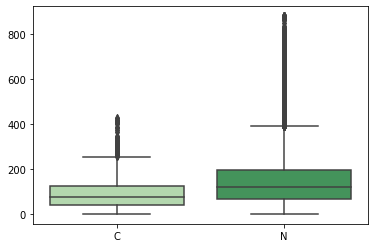

In [48]:
xxx=np.empty([len(datame[:,0])],dtype = str) 
xxx[0:len(datames[:,0])]='C'
xxx[len(datames[:,0]):]='N'
    
compare_durationrow=datame[:,0]
#my_pal = {'g','grey'}
my_pal = 'Greens'
ax = sns.boxplot(x=xxx, y=compare_durationrow, linewidth=1.5,whis=1.5,palette=my_pal)

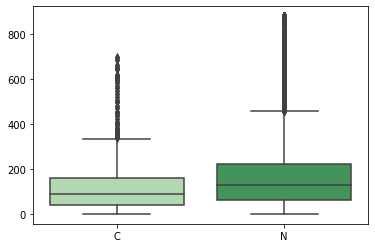

In [50]:
xxx=np.empty([len(datama[:,0])],dtype = str) 
xxx[0:len(datamas[:,0])]='C'
xxx[len(datamas[:,0]):]='N'
    
compare_durationrow=datama[:,0]
my_pal = 'Greens'
ax = sns.boxplot(x=xxx, y=compare_durationrow, linewidth=1.5,whis=1.5,palette=my_pal)

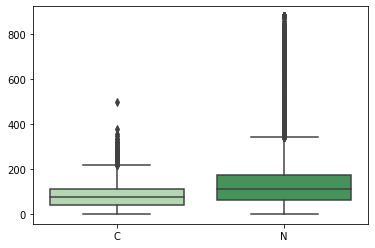

In [51]:
xxx=np.empty([len(datami)],dtype = str) 
xxx[0:len(datamis[:,0])]='C'
xxx[len(datamis[:,0]):]='N'
    
compare_durationrow=datami[:,0]
my_pal = 'Greens'
ax = sns.boxplot(x=xxx, y=compare_durationrow, linewidth=1.5,whis=1.5,palette=my_pal)

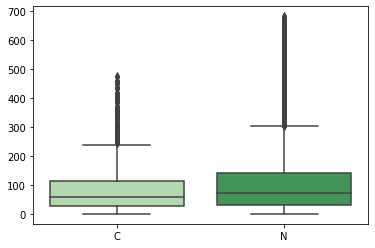

In [53]:
xxx=np.empty([len(datar)],dtype = str) 
xxx[0:len(datamrs[:,0])]='C'
xxx[len(datamrs[:,0]):]='N'
    
compare_durationrow=datar[:,0]
my_pal = 'Greens'
ax = sns.boxplot(x=xxx, y=compare_durationrow, linewidth=1.5,whis=1.5,palette=my_pal)


In [54]:
datamep=pd.DataFrame(datame)
datamep.columns=['DV','IV','type']
datamap=pd.DataFrame(datama)
datamap.columns=['DV','IV','type']
datamip=pd.DataFrame(datami)
datamip.columns=['DV','IV','type']
datarp=pd.DataFrame(datar)
datarp.columns=['DV','IV','type']

In [55]:
import statsmodels.formula.api as smf
med=smf.mixedlm("DV~IV",datamep,groups=datamep['type'])
medf = med.fit(method=['powell'])

mad=smf.mixedlm("DV~IV",datamap,groups=datamap['type'])
madf = mad.fit(method=['powell'])

mid=smf.mixedlm("DV~IV",datamip,groups=datamip['type'])
midf = mid.fit(method=['powell'])

rd=smf.mixedlm("DV~IV",datarp,groups=datarp['type'])
rdf = rd.fit(method=['powell'])

In [56]:
print(medf.summary())
print(medf.tvalues['IV'])
print(madf.summary())
print(madf.tvalues['IV'])
print(midf.summary())
print(midf.tvalues['IV'])
print(rdf.summary())
print(rdf.tvalues['IV'])

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV          
No. Observations: 65830   Method:             REML        
No. Groups:       6       Scale:              11603.4050  
Min. group size:  4786    Log-Likelihood:     -401474.8787
Max. group size:  16059   Converged:          Yes         
Mean group size:  10971.7                                 
----------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025  0.975]
----------------------------------------------------------
Intercept      99.351   11.412  8.706 0.000 76.984 121.719
IV             37.668    3.320 11.347 0.000 31.162  44.174
Group Var     716.125    4.368                            

11.347216346051031
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV          
No. Observations: 65830   Method:             REML        
No. Groups:       6       Scale:              19996.4539  

In [57]:
med=smf.mixedlm("DV~IV",datamep,groups=datamep['type'],re_formula="~IV")
medf = med.fit(method=['powell'])

mad=smf.mixedlm("DV~IV",datamap,groups=datamap['type'],re_formula="~IV")
madf = mad.fit(method=['powell'])

mid=smf.mixedlm("DV~IV",datamip,groups=datamip['type'],re_formula="~IV")
midf = mid.fit(method=['powell'])

rd=smf.mixedlm("DV~IV",datarp,groups=datarp['type'],re_formula="~IV")
rdf = rd.fit(method=['cg'])

C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [58]:
print(medf.summary())
print(madf.summary())
print(midf.summary())
print(rdf.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: DV          
No. Observations:  65830   Method:             REML        
No. Groups:        6       Scale:              11590.8004  
Min. group size:   4786    Log-Likelihood:     -401440.3654
Max. group size:   16059   Converged:          Yes         
Mean group size:   10971.7                                 
-----------------------------------------------------------
                Coef.   Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        87.619    4.476 19.576 0.000 78.846 96.391
IV               49.381   12.549  3.935 0.000 24.786 73.977
Group Var       123.634                                    
Group x IV Cov -235.611    2.246                           
IV Var          946.073    4.904                           

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: DV          
N

In [59]:
yall=np.r_[yout1,yout2,yout3,yout4,yout5,yout6]
yiall=np.r_[youti1,youti2,youti3,youti4,youti5,youti6]
yallo=np.r_[yout1c,yout2c,yout3c,yout4c,yout5c,yout6c]
yiallo=np.r_[youti1c,youti2c,youti3c,youti4c,youti5c,youti6c]

NameError: name 'yout1' is not defined

In [ ]:
plt.scatter(yall[:,0],yall[:,3],color='b')
plt.scatter(yiall[:,0],yiall[:,3],color='r')
plt.xlim(0,1000)
plt.ylim(-30,900)
plt.show()
plt.scatter(yallo[:,0],yallo[:,3],color='y')
plt.scatter(yiallo[:,0],yiallo[:,3],color='k')
plt.xlim(0,1000)
plt.ylim(-30,900)
plt.show()

In [ ]:
disall,pathall=fastdtw(yall[:,0],yiall[:,0],dist=euclidean)
disallo,pathallo=fastdtw(yallo[:,0],yiallo[:,0],dist=euclidean)
print(disall/(len(yall)+len(yiall)),disallo/(len(yallo)+len(yiallo)))

In [ ]:
disall,pathall=fastdtw(yall[:,1],yiall[:,1],dist=euclidean)
disallo,pathallo=fastdtw(yallo[:,1],yiallo[:,1],dist=euclidean)
print(disall/(len(yall)+len(yiall)),disallo/(len(yallo)+len(yiallo)))

In [ ]:
disall,pathall=fastdtw(yall[:,2],yiall[:,2],dist=euclidean)
disallo,pathallo=fastdtw(yallo[:,2],yiallo[:,2],dist=euclidean)
print(disall/(len(yall)+len(yiall)),disallo/(len(yallo)+len(yiallo)))

In [ ]:
disall,pathall=fastdtw(yall[:,3],yiall[:,3],dist=euclidean)
disallo,pathallo=fastdtw(yallo[:,3],yiallo[:,3],dist=euclidean)
print(disall/(len(yall)+len(yiall)),disallo/(len(yallo)+len(yiallo)))